In [1]:
import gudhi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from mpl_toolkits.mplot3d import Axes3D
import random

import scipy.io


In [2]:

with open('mono_torus.obj') as f:
    toruh = f.readlines()

toruh = list(filter(lambda x: x.startswith('v '), toruh))

toruh = random.sample(toruh, k=len(toruh)//3)

In [3]:
x,y,z = [],[],[]
pc = []
for l in toruh:
    l = l[:-1]
    x0,y0,z0 = l.split()[1:]
    pc.append([float(o) for o in [x0,y0,z0]])
    x.append(float(x0))
    z.append(float(y0))
    y.append(float(z0))
pc = np.array(pc)



In [4]:
pc.shape

(192, 3)

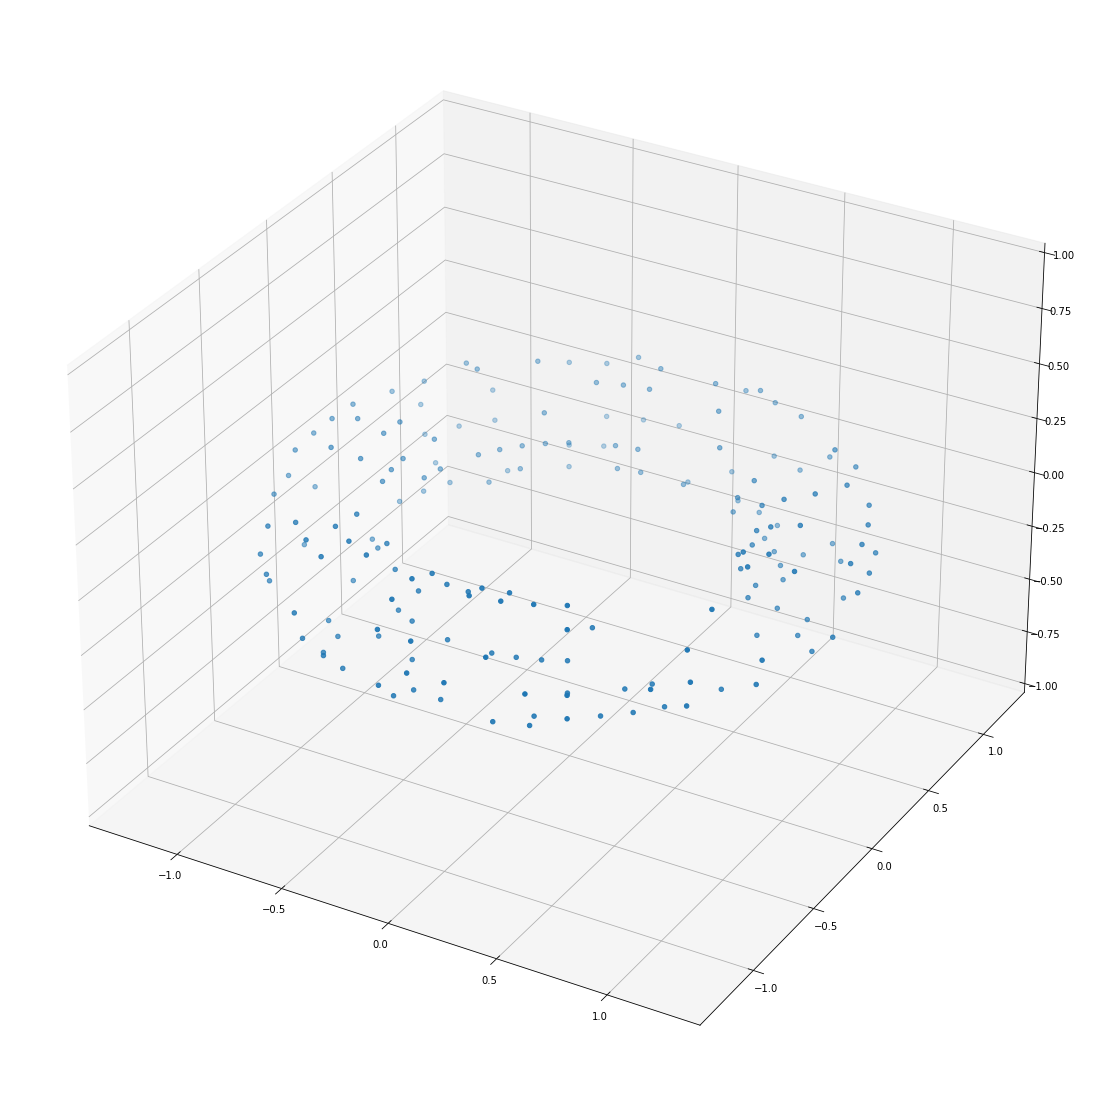

In [5]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)
ax.mouse_init()
ax.set_zlim(-1,1)
plt.show()

In [6]:
#pc = gudhi.read_points_from_off_file("mono_torus.off")

rc  : gudhi.RipsComplex = gudhi.RipsComplex(points = pc, max_edge_length=0.3)

In [7]:
simplex_tree = rc.create_simplex_tree(max_dimension=2)
triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0])==3])
#simplex_tree.num_vertices()
#simplex_tree.dimension()

/tmp/ipykernel_5548/202730999.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


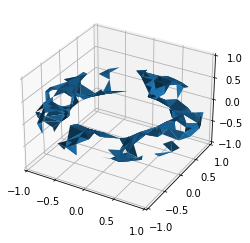

In [8]:
fig = plt.figure()
ax = fig.gca(projection='3d')
pc = np.array(pc)
ax.plot_trisurf(pc[:,2], pc[:,0], pc[:,1], triangles=triangles)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
plt.show()

In [9]:
triangles

array([[  0,   6, 157],
       [  0,   6, 167],
       [  0,   6, 170],
       ...,
       [157, 167, 170],
       [158, 185, 187],
       [159, 175, 176]])

In [10]:
mat = scipy.io.loadmat('../../Downloads/GS.mat')

In [11]:
#mat['segImg']#.sum()
#.shape

In [12]:
for k in mat.keys():
    if type(mat[k]) is np.ndarray:
        print(k, mat[k].shape)

B (50, 1)
E (50, 1)
FileTif (1,)
FinalImage (400, 400, 400)
InfoImage (400, 1)
NumberImages (1, 1)
S (50, 1)
V (50, 1)
dBdx (49, 1)
dSdx (49, 1)
dVdx (49, 1)
i (1, 1)
mImage (1, 1)
nImage (1, 1)
segImg (400, 400, 400)
x (50, 1)
x1 (1, 49)


In [13]:
mat['segImg'][~(mat['segImg'] > 0)]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

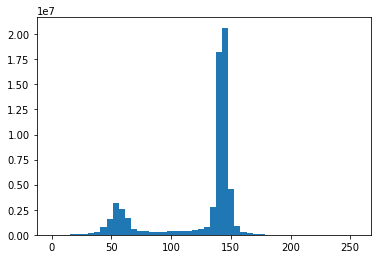

In [14]:
plt.hist(mat['FinalImage'].flatten(), bins=50)
plt.show()

In [15]:
smp = mat['FinalImage'][:50, :50,:50]
hooy = np.argwhere(abs(56-smp) < 5)

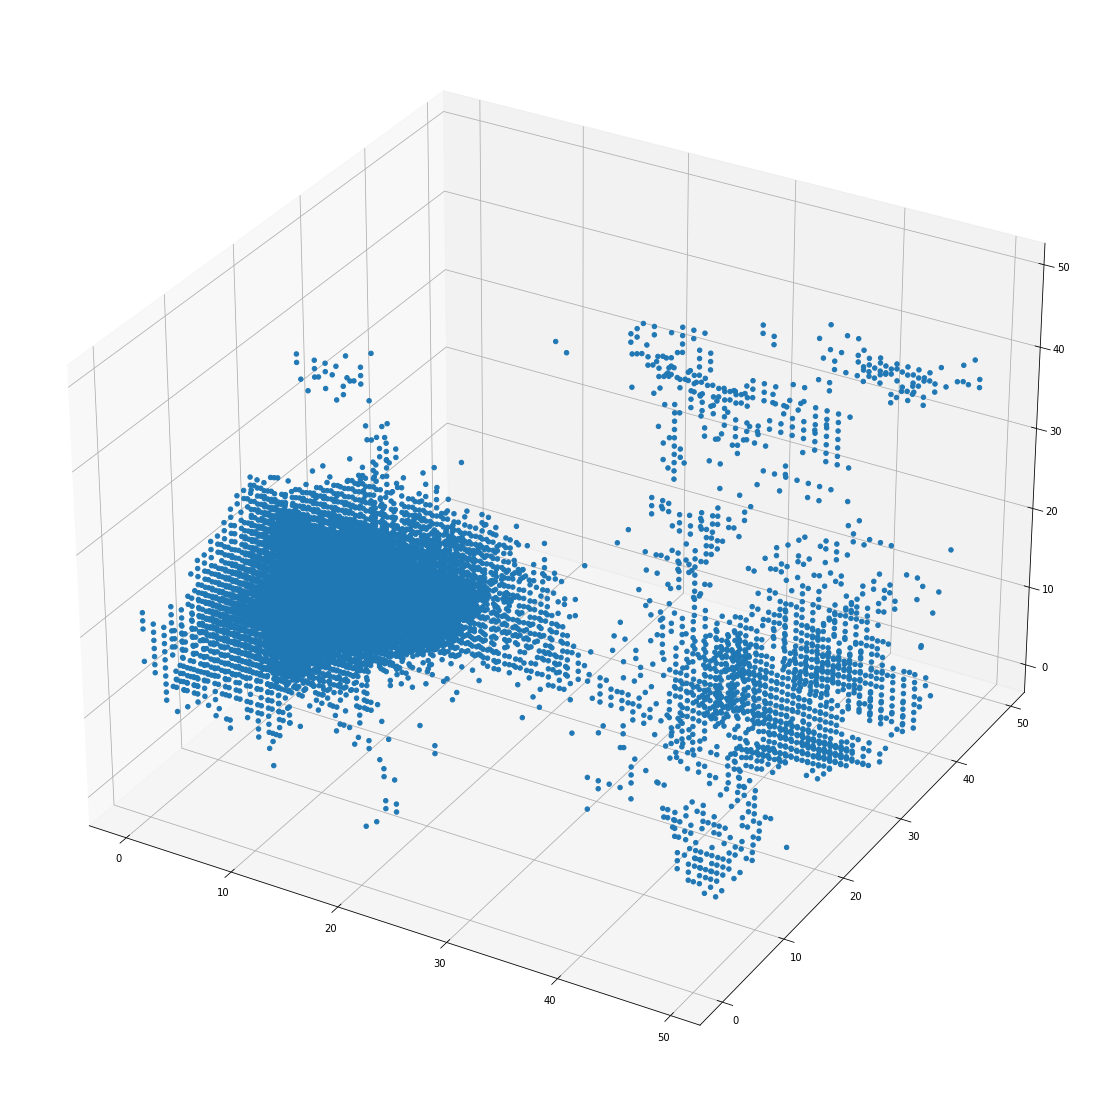

In [17]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(hooy[:,0], hooy[:,2], hooy[:,1], alpha=0.99)
plt.show()

In [18]:
rc  : gudhi.RipsComplex = gudhi.RipsComplex(points = hooy, max_edge_length=5)


In [19]:
simplex_tree = rc.create_simplex_tree(max_dimension=2)


In [ ]:
triangles = np.array([s[0] for s in simplex_tree.get_skeleton(2) if len(s[0])==3])

/tmp/ipykernel_38255/3305062998.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


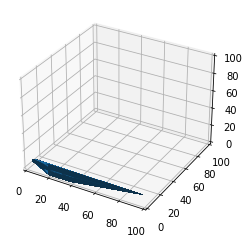

In [53]:
fig = plt.figure()
ax = fig.gca(projection='3d')
pc = np.array(hooy)
ax.plot_trisurf(hooy[:,2], hooy[:,0], hooy[:,1], triangles=triangles)
ax.set_xlim(0,100)
ax.set_ylim(0,100)
ax.set_zlim(0,100)
plt.show()